#Run this notebook on [Google Colab](https://colab.research.google.com/)

In [1]:
# install ta-lib

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz \
  && sudo tar -xzf ta-lib-0.4.0-src.tar.gz \
  && sudo rm ta-lib-0.4.0-src.tar.gz \
  && cd ta-lib/ \
  && sudo ./configure --prefix=/usr \
  && sudo make \
  && sudo make install \
  && cd ~ \
  && sudo rm -rf ta-lib/ \
  && pip install ta-lib

--2022-12-12 19:20:33--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-12 19:20:33--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-12 19:20:34--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import talib as ta
import yfinance as yf


import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import numpy as np
import pandas as pd


In [4]:
df = yf.download('RELIANCE.NS',start='2021-12-1',end='2022-12-12',interval = "1h")
df.tail(5)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2022-12-09 11:15:00,2638.800049,2641.500000,2631.500000,2638.649902,2638.649902,492931
2022-12-09 12:15:00,2638.449951,2639.600098,2618.600098,2620.449951,2620.449951,650904
2022-12-09 13:15:00,2620.550049,2623.800049,2607.949951,2608.500000,2608.500000,794885
2022-12-09 14:15:00,2609.100098,2612.100098,2602.149902,2612.100098,2612.100098,1134489
2022-12-09 15:15:00,2612.000000,2612.000000,2605.250000,2609.000000,2609.000000,788223


In [5]:
df['MA'] = ta.SMA(df['Close'], timeperiod = 20)
df['upper_band'], df['middle_band'], df['lower_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df['RSI'] = ta.RSI(df['Close'],timeperiod=14) 
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,MA,upper_band,middle_band,lower_band,RSI
2022-12-09 11:15:00,2638.800049,2641.500000,2631.500000,2638.649902,2638.649902,492931,2659.492505,2692.873855,2659.492505,2626.111154,30.620034
2022-12-09 12:15:00,2638.449951,2639.600098,2618.600098,2620.449951,2620.449951,650904,2656.065002,2690.677850,2656.065002,2621.452155,24.022372
2022-12-09 13:15:00,2620.550049,2623.800049,2607.949951,2608.500000,2608.500000,794885,2651.847498,2688.024245,2651.847498,2615.670750,20.846276
2022-12-09 14:15:00,2609.100098,2612.100098,2602.149902,2612.100098,2612.100098,1134489,2647.942505,2683.573253,2647.942505,2612.311757,24.101952
2022-12-09 15:15:00,2612.000000,2612.000000,2605.250000,2609.000000,2609.000000,788223,2644.262500,2680.017982,2644.262500,2608.507018,23.216407


## Mean Reversal Strategy

Buy -> RSI > 75 & Close > BB upper band

Sell -> RSI < 25 & Close < BB lower band

BB = Bollinger Band

Stop Loss = 10% = Sell/Buy = 90% 

In [6]:
conditions = [(df['RSI']<25)&(df['Close']<df['lower_band']),(df['RSI']>75)&(df['Close']>df['upper_band'])]
choices = ['Buy','Sell']
df['Signal'] = np.select(conditions,choices)
df.dropna(inplace=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,MA,upper_band,middle_band,lower_band,RSI,Signal
2021-12-03 14:15:00,2423.449951,2425.000000,2400.000000,2407.949951,2407.949951,2387574,2458.612512,2503.102884,2458.612512,2414.122141,38.371220,0
2021-12-03 15:15:00,2407.949951,2414.800049,2403.550049,2413.149902,2413.149902,1002202,2457.537512,2505.216639,2457.537512,2409.858386,40.966456,0
2021-12-06 09:15:00,2416.500000,2425.000000,2391.500000,2394.100098,2394.100098,0,2454.657520,2509.777093,2454.657520,2399.537946,35.130022,0
2021-12-06 10:15:00,2394.949951,2403.750000,2383.100098,2393.699951,2393.699951,931583,2452.227515,2513.278078,2452.227515,2391.176951,35.017169,0
2021-12-06 11:15:00,2393.100098,2397.149902,2387.000000,2390.949951,2390.949951,245000,2449.370007,2516.019019,2449.370007,2382.720996,34.203946,0


In [7]:
# convert date index to a column so that we can store the row index of a particular Buy/Sell for list iteration
df['Date']=df.index
df = df.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=1767, step=1)

In [8]:
# We generally Buy/Sell on next day open once we identify a pattern
df['Signal'] = df['Signal'].shift(1)
df['Shifted Close'] = df['Close'].shift(1)

In [9]:
#from datetime import datetime

# position tells us our postion -> True => Long , False => Short
# here our target is swing - so no Short Selling 
position = False
buy_day,sell_day,buy_price,sell_price = [],[],[],[]

for idx,row in df.iterrows():
  #idx = idx.strftime("%Y-%m-%d")

  if not position and row['Signal']=='Buy':
    buy_day.append(idx)
    buy_price.append(row['Open']) # buy at next day open
    position=True
  if position: # no short selling
    stop_loss = row['Shifted Close'] < 0.90 * buy_price[-1] # stop-loss < 10%
    if row['Signal']=='Sell' or stop_loss: # this trade is over - once we sell it or hit stop loss
      sell_day.append(idx)
      sell_price.append(row['Open'])
      position=False


In [10]:
revenue = pd.Series([(sell-buy)/buy for sell,buy in zip(sell_price,buy_price)])
revenue

0    0.079285
1    0.042053
2    0.097059
3   -0.002340
dtype: float64

In [11]:
cumulated_revenue = (revenue + 1).prod()       # so we made this much profit
cumulated_revenue

1.2309447033063754

In [15]:
# lets check buy-days in between start='2021-12-1',end='2022-12-12'
buys = pd.DataFrame(df.iloc[buy_day][['Date','Open','Close','upper_band','lower_band']])
buys.index = pd.to_datetime(buys['Date'])
buys

,Date,Open,Close,upper_band,lower_band
Date,,,,,
2021-12-20 12:15:00,2021-12-20 12:15:00,2276.600098,2253.300049,2437.042948,2262.647066
2022-01-24 14:15:00,2022-01-24 14:15:00,2379.149902,2381.800049,2526.256475,2395.703486
2022-05-09 10:15:00,2022-05-09 10:15:00,2552.050049,2536.000000,2744.691590,2547.218395
2022-09-16 11:15:00,2022-09-16 11:15:00,2521.500000,2505.750000,2642.148019,2513.441972
2022-12-09 13:15:00,2022-12-09 13:15:00,2620.550049,2608.500000,2688.024245,2615.670750


In [16]:
# lets check sell-days in between start='2021-12-1',end='2022-12-12'
sells = pd.DataFrame(df.iloc[sell_day][['Date','Open','Close','upper_band','lower_band']])
sells.index = pd.to_datetime(sells['Date'])
sells

,Date,Open,Close,upper_band,lower_band
Date,,,,,
2022-01-04 15:15:00,2022-01-04 15:15:00,2457.100098,2460.000000,2463.126662,2343.608323
2022-03-17 15:15:00,2022-03-17 15:15:00,2479.199951,2488.949951,2481.262513,2335.212511
2022-06-03 10:15:00,2022-06-03 10:15:00,2799.750000,2802.850098,2791.197608,2571.042407
2022-10-19 11:15:00,2022-10-19 11:15:00,2515.600098,2506.449951,2519.656532,2333.363463


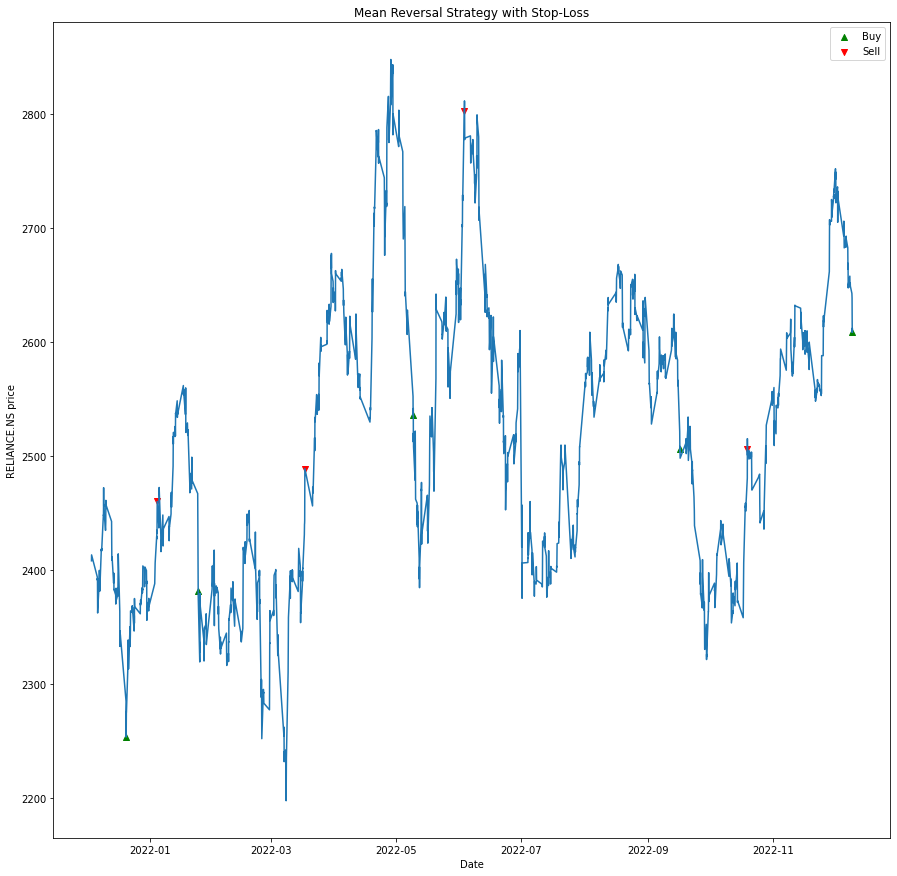

In [17]:
plt.figure(figsize=(15,15))
#plt.style.use('dark_background')

buy_sig = plt.scatter(df.iloc[buy_day]['Date'],df.iloc[buy_day]['Close'],marker='^',color='g')
sell_sig = plt.scatter(df.iloc[sell_day]['Date'],df.iloc[sell_day]['Close'],marker='v',color='r')

df['Datetime'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.set_index('Datetime')

plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('RELIANCE.NS price')
plt.title('Mean Reversal Strategy with Stop-Loss')
plt.legend([buy_sig,sell_sig],['Buy','Sell'])
plt.show()

In [26]:
import plotly.graph_objects as go

#fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig = go.Figure(go.Scatter(x=df.index,y=df['Close'],name='RELIANCE>NS'))

fig.update_layout(title='Mean Reversal Strategy with Stop-Loss',yaxis_title='RELIANCE.NS Stock')

fig.add_scatter(x=df.iloc[buy_day]['Date'],y=df.iloc[buy_day]['Close'],mode='markers',
                marker=dict(size=10,color='#00ff16',symbol='triangle-up'),name='Buy')

fig.add_scatter(x=df.iloc[sell_day]['Date'],y=df.iloc[sell_day]['Close'],mode='markers',
                marker=dict(size=8,color='#d62728',symbol='triangle-down'),name='Sell')

fig.show()


     

In [ ]:
#

DatetimeIndex(['2021-12-03 14:15:00', '2021-12-03 15:15:00',
               '2021-12-06 09:15:00', '2021-12-06 10:15:00',
               '2021-12-06 11:15:00', '2021-12-06 12:15:00',
               '2021-12-06 13:15:00', '2021-12-06 14:15:00',
               '2021-12-06 15:15:00', '2021-12-07 09:15:00',
               ...
               '2022-12-08 13:15:00', '2022-12-08 14:15:00',
               '2022-12-08 15:15:00', '2022-12-09 09:15:00',
               '2022-12-09 10:15:00', '2022-12-09 11:15:00',
               '2022-12-09 12:15:00', '2022-12-09 13:15:00',
               '2022-12-09 14:15:00', '2022-12-09 15:15:00'],
              dtype='datetime64[ns]', name='Datetime', length=1767, freq=None)